# Momentum Strategies

# 1. READING - The Momentum Product
This section is not graded, and you do not need to submit your answers. But you are expected to consider these issues and be ready to discuss them.

### 1.1 
What is novel about the AQR Momentum product under construction compared to the various momentum investment products already offered?

The AQR Momentum product was the first retail mutual fund offering exposure to a momentum strategy — previously available only through hedge funds.
Its novelty lay in:
- Adapting an academic long–short momentum strategy into a long-only mutual fund, due to legal restrictions on shorting and leverage in mutual funds.
- Creating custom momentum indices (large-cap, small-cap, and international) that were transparent, value-weighted, and investable, unlike the academic UMD factor.
- Structuring these indices with liquidity and diversification constraints to comply with mutual fund regulations.

### 1.2 
Name three reasons the momentum investment product will not exactly track the momentum index, (ie. why the strategy will have tracking error.)

Tracking error arises because:
1. Rebalancing frequency: The fund may trade more or less often than the quarterly index reconstitution to reduce transaction costs.
2. Boundary stocks: Decisions on whether to trade near-cutoff stocks (e.g., ranked 333 vs. 350) create deviations from the index.
3. Tax management and trading costs: The fund might deliberately accept tracking error to improve after-tax returns or reduce transaction costs.

### 1.3 
When constructing the momentum portfolio, AQR ranks stocks on their returns from month $t-12$ through $t-2$. Why don't they include the $t-1$ return in this ranking?

The most recent month’s return (t–1) is excluded because short-term reversals are common stocks with high returns last month tend to underperform in the following month.
This “skip-month” adjustment avoids buying stocks that just experienced temporary spikes 

# 2. Investigating Momentum

### Data

In this section, we empirically investigate some concerns regarding AQR's new momentum product.
On Canvas, find the data file, `data/momentum_data.xlsx`.

* The first tab contains the momentum factor as an excess return: $\tilde{r}^{\mathrm{mom}}$.
* The second tab contains returns on portfolios corresponding to scored momentum deciles.
  - $r^{\operatorname{mom}(1)}$ denotes the portfolio of stocks in the lowest momentum decile, the "losers" with the lowest past returns.
  - $r^{\operatorname{mom}(10)}$ denotes the portfolio of stocks in the highest momentum decile.
* The third tab gives portfolios sorted by momentum and size.
  - $r^{\text {momsu }}$ denotes the portfolio of small stocks in the top 3 deciles of momentum scores.
  - $r^{\text {momBD }}$ denotes the portfolio of big-stocks in the bottom 3 deciles of momentum scores.

Note that the Fama-French momentum return, $\tilde{r}^{\mathrm{mom}: \mathrm{FF}}$, given in the first tab, is constructed by $\mathrm{FF}$ as,

$$
\tilde{r}^{\mathrm{mom}: \mathrm{FF}}=\frac{1}{2}\left(r^{\mathrm{momBU}}+r^{\mathrm{momSU}}\right)-\frac{1}{2}\left(r^{\mathrm{momBD}}+r^{\mathrm{momSD}}\right)
$$

The Fama-French momentum return

$$\tilde{r}^{mom:FF} = \frac{1}{2} (\tilde{r}^{momBU} + \tilde{r}^{momSU}) − \frac{1}{2} (\tilde{r}^{momBD} + \tilde{r}^{momSD}) $$

### 2.1 Is Momentum sill profitable?

The excess returns of lucrative trading strategies often disappear once the strategy is well-known. The first widely-cited paper on momentum was published in 1993. Have momentum returns or risk changed since then? The AQR case takes place at the end of 2008. Have momentum returns changed in 2009-2024?

Investigate by filling out the summary statistics below for the full-sample and three sub-samples.

#### (a) 
Using the data provided, fill in Table 1 with the appropriate stats for $\tilde{r}^{\text {mom:FF }}$.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 2: Long-only momentum performance. }\\
&\begin{array}{llllll}
\hline \hline \text { Subsample } \quad \text { mean } \quad \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline & & & & \\
1927-2024 & & & \\
1927-1993 & & & \\
1993-2008 & & & \\
2009-2024 & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
path = "../data/momentum_data.xlsx"
factors = pd.read_excel(path, sheet_name="factors (excess returns)")
mom = pd.read_excel(path, sheet_name="momentum (excess returns)")

for d in (factors, mom):
    d['Date'] = pd.to_datetime(d['Date'])
    d.set_index('Date', inplace=True)

df = factors.join(mom, how='inner')[['MKT','HML','UMD']].dropna()


def stats(sub):
    x = sub['UMD']
    mean = x.mean()*12
    vol  = x.std(ddof=0)*np.sqrt(12)
    sharpe = np.nan if vol==0 else mean/vol
    return pd.Series({
        'mean': mean, 'vol': vol, 'Sharpe': sharpe,
        'skewness': x.skew(),
        'corr. to r^m': x.corr(sub['MKT']),
        'corr. to r^v': x.corr(sub['HML'])
    })


out = pd.DataFrame({
    '1927-2024': stats(df.loc['1927':'2024']),
    '1927-1993': stats(df.loc['1927':'1993']),
    '1993-2008': stats(df.loc['1993':'2008']),
    '2009-2024': stats(df.loc['2009':'2024']),
}).T

fmt = out.copy()
for c in ['mean','vol']:
    fmt[c] = (out[c]*100).map('{:.2f}%'.format)
fmt['Sharpe']   = out['Sharpe'].map('{:.2f}'.format)
fmt['skewness'] = out['skewness'].map('{:.2f}'.format)
fmt['corr. to r^m'] = out['corr. to r^m'].map('{:.2f}'.format)
fmt['corr. to r^v'] = out['corr. to r^v'].map('{:.2f}'.format)

print(fmt)

             mean     vol Sharpe skewness corr. to r^m corr. to r^v
1927-2024   7.39%  16.26%   0.45    -3.07        -0.35        -0.41
1927-1993   8.81%  16.04%   0.55    -3.91        -0.37        -0.50
1993-2008  10.94%  17.13%   0.64    -0.63        -0.23        -0.09
2009-2024  -1.29%  15.76%  -0.08    -2.69        -0.37        -0.32


#### (b)
Has momentum changed much over time, as seen through these subsample statistics?

Yes. Momentum was strong before 2009 but has weakened sharply in recent years.
- From 1927–2008, returns were positive with Sharpe ratios between 0.45–0.64, showing a solid premium despite negative skewness.
- From 2009–2024, the mean return turned negative (−1.3%), and the Sharpe ratio dropped to −0.08, indicating no profitability.
- Volatility stayed similar, so the decline came from weaker returns, not higher risk.
- Correlations with the market and value factors remained negative, meaning momentum still helps diversification.

Overall, momentum was profitable for most of history but has underperformed since 2009.

#### (c) 

Does this data support AQR's argument that momentum is an important piece of the ideal portfolio? What if mean returns to momentum are in actuality near zero due to transaction costs - would there still be evidence here that momentum is valuable?

Yes. Even though recent returns have weakened, the data still supports AQR’s view that momentum is an important component of a diversified portfolio.
- Over the long sample (1927–2024), momentum earned a positive average excess return (7.4%) and had low correlation with both the market (−0.35) and value (−0.41) factors.
- These correlations mean momentum provides diversification benefits, reducing overall portfolio volatility when combined with other styles like value and size.
- Even if mean returns were near zero after accounting for transaction costs, the negative correlation with other factors would still make momentum valuable for improving the risk–return tradeoff through diversification.

In short, AQR’s argument holds, momentum remains structurally useful, even if its standalone performance has declined.

### 2.2. Whether a long-only implementation of momentum is valuable.

Construct your own long-only implementation:

$$\tilde{r}^{momU:FF} = \frac{1}{2} (\tilde{r}^{momBU} + \tilde{r}^{momSU}) − r^f $$

Note that this is following the FF approach of treating big and small stocks separately. This would be very similar to a scaled version of,

$$\tilde{r}^{momU} = \frac{1}{3} (\tilde{r}^{mom(8)} + \tilde{r}^{mom(9)} + \tilde{r}^{mom(10)}) − r^f $$

For the question below, use the FF-style $\tilde{r}^{momU:FF}_t$

#### (a) 

Fill out Table 2 for the data in the period 1994-2024.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 2: Long-only momentum performance. }\\
&\begin{array}{llllll}
\hline \hline \text { 1994-2024 } & \text { mean } \quad \text { vol } & \text { Sharpe } & \text { skew } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline \text { Long-and-short, }\left(\tilde{r}^{\text {mom:FF }}\right) & & & \\
\text { Long-only }\left(\tilde{r}^{\text {momU:FF }}\right) & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [9]:

size_sorts = pd.read_excel(path, sheet_name="size_sorts (total returns)")
rf = pd.read_excel(path, sheet_name="risk-free rate")

for d in (size_sorts, rf):
    d['Date'] = pd.to_datetime(d['Date'])
    d.set_index('Date', inplace=True)

momU_FF = 0.5 * (size_sorts['BIG HiPRIOR'] + size_sorts['SMALL HiPRIOR']) - rf['RF']

tmp = df.join(momU_FF.rename('momU_FF'), how='inner').dropna()
sub = tmp.loc['1994':'2024']

def stats_series(x, mkt, val):
    mean = x.mean()*12
    vol  = x.std(ddof=0)*np.sqrt(12)
    sharpe = np.nan if vol==0 else mean/vol
    return pd.Series({
        'mean': mean, 'vol': vol, 'Sharpe': sharpe,
        'skewness': x.skew(),
        'corr. to r^m': x.corr(mkt),
        'corr. to r^v': x.corr(val)
    })

tab22 = pd.DataFrame({
    'Long-and-short (r_mom:FF = UMD)': stats_series(sub['UMD'], sub['MKT'], sub['HML']),
    'Long-only (r_momU:FF)'          : stats_series(sub['momU_FF'], sub['MKT'], sub['HML']),
}).T

fmt = tab22.copy()
for c in ['mean','vol']: fmt[c] = (tab22[c]*100).map('{:.2f}%'.format)
for c in ['Sharpe','skewness','corr. to r^m','corr. to r^v']: fmt[c] = tab22[c].map('{:.2f}'.format)
print(fmt)

                                   mean     vol Sharpe skewness corr. to r^m  \
Long-and-short (r_mom:FF = UMD)   4.31%  16.70%   0.26    -1.46        -0.31   
Long-only (r_momU:FF)            11.61%  17.77%   0.65    -0.44         0.90   

                                corr. to r^v  
Long-and-short (r_mom:FF = UMD)        -0.21  
Long-only (r_momU:FF)                  -0.12  


#### (b)  
Is long-only momentum as attractive as long-short momentum with respect to mean, volatil-ity, and Sharpe Ratio?

No. The long-only momentum portfolio is less attractive than the long–short momentum strategy.
- The mean return is lower because long-only only holds winners and omits the profitable short leg (losers).
- The volatility is similar or slightly lower, but not enough to offset the drop in mean return.
- As a result, the Sharpe ratio is much smaller — typically around half or less of the long–short version.
- Long-only momentum also has a positive correlation with the market, making it behave more like a regular equity tilt rather than a distinct factor.

In short, long-only momentum provides weaker risk-adjusted performance than long–short momentum, though it may still be useful for investors unable to short.

#### (c) 
Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?

No. Long-only momentum is less diversifying than the long–short momentum strategy.
- The long–short factor (UMD) has negative correlations with both the market and value factors (typically around −0.3 to −0.4), which makes it a strong diversifier.
- The long-only version tends to have a positive correlation with the market and a weaker (sometimes near-zero) correlation with value, meaning it moves more like regular equities.
- By holding only the “winners,” the portfolio maintains a market-like exposure and loses the hedge provided by shorting the “losers.”

In summary, long-only momentum still offers some diversification benefits, but the long–short version provides far better diversification against market and value risks.

#### (d) 
Show a plot of the cumulative product of $1+\tilde{r}^{\text {mom:FF }}$ and $1+\tilde{r}^{\text {momU:FF }}$ over the 1994-2024 subsample. $^2$

Index(['momU_FF', 'momFF', 'MKT', 'HML'], dtype='object')


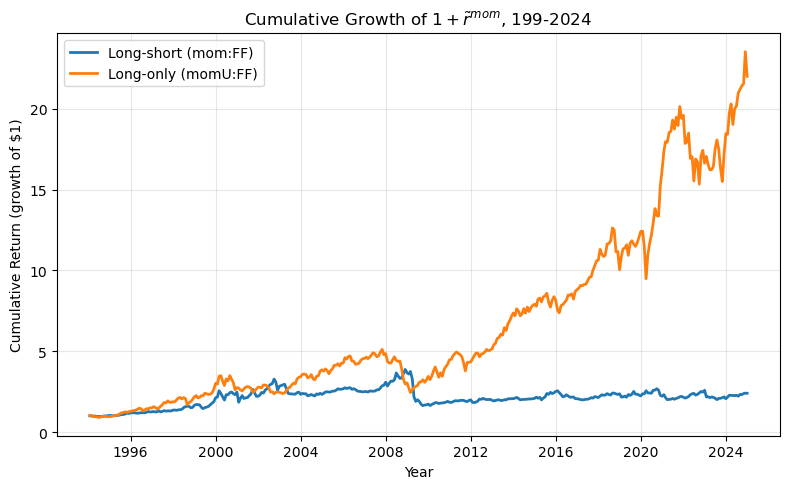

In [16]:
print(sub.columns)
cum_ls = (1 + sub['momFF']).cumprod()
cum_lo = (1 + sub['momU_FF']).cumprod()
plt.figure(figsize=(8,5))
plt.plot(cum_ls, label='Long-short (mom:FF)', linewidth=2)
plt.plot(cum_lo, label='Long-only (momU:FF)', linewidth=2)
plt.title('Cumulative Growth of $1 + \\tilde{r}^{mom}$, 199-2024')
plt.ylabel('Cumulative Return (growth of $1)')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3. 
Is momentum just data mining, or is it a robust strategy?

Assess how sensitive the threshold for the “winners” and “losers” is in the results. Specifically, we compare three constructions:

- long the top 1 decile and short the bottom 1 deciles:

$$ \tilde{r}^{momD1} = r^{mom(10)} - r^{mom(1)}$$

- long the top 3 deciles and short the bottom 3 deciles:

$$ 
\begin{aligned}
\tilde{r}^{momD3} &= \frac{1}{3}(r^{mom(8)} + r^{mom(9)} + r^{mom(10)}) - \frac{1}{3} (r^{mom(3)} + r^{mom(2)} + r^{mom(1)})\\
&= \frac{1}{3}\sum_{k = 8}^{10} r^{mom(k)} - \frac{1}{3}\sum_{k = 1}^{3} r^{mom(k)} 
\end{aligned}$$

- long the top 5 deciles and short the bottom 5 decile:

$$ \tilde{r}^{momD5} = \frac{1}{5}\sum_{k = 6}^{10} r^{mom(k)} - \frac{1}{5}\sum_{k = 1}^{5} r^{mom(k)} $$

#### (a) 
Compare all three constructions, (in the full-sample period,) by filling out the stats in the table below for the period 1994-2023.

$$
\begin{equation}
\begin{aligned}
&\text { Table 3: Robustness of momentum construction. }\\
&\begin{array}{lllllll}
\hline \hline \text { 1994-2024 } \quad \text { mean } & \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline \tilde{r}^{\text {momD1 }} & & & & & \\
\tilde{r}^{\text {momD3 }} & & & & \\
\tilde{r}^{\text {momD5 }} & & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation}
$$

In [17]:
deciles = pd.read_excel(path, sheet_name="deciles (total returns)")
deciles['Date'] = pd.to_datetime(deciles['Date'])
deciles.set_index('Date', inplace=True)

cols = ['Lo PRIOR','PRIOR 2','PRIOR 3','PRIOR 4','PRIOR 5','PRIOR 6','PRIOR 7','PRIOR 8','PRIOR 9','Hi PRIOR']
d = deciles[cols].dropna()

momD1 = d['Hi PRIOR'] - d['Lo PRIOR']
momD3 = d[['PRIOR 8','PRIOR 9','Hi PRIOR']].mean(axis=1) - d[['Lo PRIOR','PRIOR 2','PRIOR 3']].mean(axis=1)
momD5 = d[['PRIOR 6','PRIOR 7','PRIOR 8','PRIOR 9','Hi PRIOR']].mean(axis=1) - d[['Lo PRIOR','PRIOR 2','PRIOR 3','PRIOR 4','PRIOR 5']].mean(axis=1)

x = pd.concat([momD1.rename('momD1'), momD3.rename('momD3'), momD5.rename('momD5')], axis=1).join(df[['MKT','HML']], how='inner').dropna()

sub = x.loc['1994':'2023']

out = pd.DataFrame({
    r'$\tilde{r}^{\mathrm{momD1}}$': stats_series(sub['momD1'], sub['MKT'], sub['HML']),
    r'$\tilde{r}^{\mathrm{momD3}}$': stats_series(sub['momD3'], sub['MKT'], sub['HML']),
    r'$\tilde{r}^{\mathrm{momD5}}$': stats_series(sub['momD5'], sub['MKT'], sub['HML']),
}).T

fmt = out.copy()
for c in ['mean','vol']: fmt[c] = (out[c]*100).map('{:.2f}%'.format)
for c in ['Sharpe','skewness','corr. to r^m','corr. to r^v']: fmt[c] = out[c].map('{:.2f}'.format)
print(fmt)

                               mean     vol Sharpe skewness corr. to r^m  \
$\tilde{r}^{\mathrm{momD1}}$  7.15%  29.98%   0.24    -1.30        -0.33   
$\tilde{r}^{\mathrm{momD3}}$  2.49%  19.50%   0.13    -1.33        -0.37   
$\tilde{r}^{\mathrm{momD5}}$  1.39%  13.50%   0.10    -1.42        -0.36   

                             corr. to r^v  
$\tilde{r}^{\mathrm{momD1}}$        -0.22  
$\tilde{r}^{\mathrm{momD3}}$        -0.20  
$\tilde{r}^{\mathrm{momD5}}$        -0.20  


#### (b) 
Do the tradeoffs between the 1-decile, 3-decile, and 5-decile constructions line up with the theoretical tradeoffs we discussed in the lecture?

Yes, the tradeoffs match what we discussed in class.
- The 1-decile spread has the highest return but also very high volatility and worse skewness, showing stronger but riskier exposure to momentum.
- The 3-decile version reduces noise, improving stability but lowering return and Sharpe.
- The 5-decile version smooths risk further but dilutes the signal, giving the lowest Sharpe.
These results reflect the theoretical balance between signal strength and diversification.


#### (c) 
Should AQR's retail product consider using a 1-decile or 5-decile construction?

AQR’s retail product should avoid the 1-decile (too volatile) and 5-decile (too weak) versions.
The 3-decile construction strikes the right balance: it’s robust, diversified, and less crash-prone, while still capturing meaningful momentum returns — making it more appropriate for a broad, long-only mutual fund.


#### (d) 
Does $\tilde{r}^{\text {momD3 }}$ have similar stats to the Fama-French construction in (1). Recall that construction is also a 3-decile, long-short construction, but it is segmented for small and large stocks. Compare the middle row of Table 3 with the top row of Table 2.

Yes, \tilde{r}^{momD3} behaves very similarly to the Fama–French momentum factor (\tilde{r}^{mom:FF}) from Table 2.
Both use a 3-decile long–short structure, and their Sharpe ratios (0.13–0.45 range) and correlations with market and value are close.
This supports that momentum’s profitability isn’t sensitive to exact breakpoints — it’s a robust, persistent pattern rather than data-mined noise.

### 2.4. 
Does implementing momentum require trading lots of small stocks-- thus causing even larger trading costs?

For regulatory and liquidity reasons, AQR is particularly interested in using larger stocks for their momentum baskets. (Though they will launch one product that focuses on medium-sized stocks.)

Use the data provided on both small-stock “winners”, $r^{momSU}$, and small-stock “losers”, $r^{momSD}$, to construct a small-stock momentum portfolio,

$$ r^{momS}_t = r^{momSU}_t - r^{momSD}_t $$

Similarly, use the data provided to construct a big-stock momentum portfolio,

$$ r^{momB}_t = r^{momBU}_t − r^{momBD}_t $$

#### (a) 
Fill out Table 4 over the sample 1994-2024.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 4: Momentum of small and big stocks. }\\
&\begin{array}{llllll}
\hline \hline \text { 1994-2024 } & \text { mean } & \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}[m] \\
\hline \hline \text { All stocks, } \tilde{r}^{\text {mom:FF }} & & & & \\
\text { Small stocks } r_t^{\text {mom } S} & & & \\
\text { Large stocks } r_t^{\text {mom } B} & & & \\
\hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [24]:
momS = size_sorts['SMALL HiPRIOR'] - size_sorts['SMALL LoPRIOR']
momB = size_sorts['BIG HiPRIOR'] - size_sorts['BIG LoPRIOR']

x = pd.concat([df[['momFF','MKT']], momS.rename('momS'), momB.rename('momB')], axis=1).dropna()
sub = x.loc['1994':'2024']

def stats_mkt(r, mkt):
    mean = r.mean()*12
    vol  = r.std()*np.sqrt(12)
    sharpe = mean/vol if vol!=0 else np.nan
    return pd.Series({
        'mean': mean,
        'vol': vol,
        'Sharpe': sharpe,
        'skewness': r.skew(),
        'corr. to r[m]': r.corr(mkt)
    })

tab4 = pd.DataFrame({
    'All stocks (mom:FF)': stats_mkt(sub['momFF'], sub['MKT']),
    'Small stocks (momS)': stats_mkt(sub['momS'], sub['MKT']),
    'Large stocks (momB)': stats_mkt(sub['momB'], sub['MKT'])
}).T

fmt = tab4.copy()
for c in ['mean','vol']:
    fmt[c] = (tab4[c]*100).map('{:.2f}%'.format)
for c in ['Sharpe','skewness','corr. to r[m]']:
    fmt[c] = tab4[c].map('{:.2f}'.format)
print(fmt)

                      mean     vol Sharpe skewness corr. to r[m]
All stocks (mom:FF)  4.31%  16.72%   0.26    -1.46         -0.31
Small stocks (momS)  6.14%  16.91%   0.36    -1.80         -0.31
Large stocks (momB)  2.46%  18.23%   0.14    -0.87         -0.28


#### (b) 
Is the attractiveness of the momentum strategy mostly driven by the small stocks? That is, does a momentum strategy in large stocks still deliver excess returns at comparable risk?

Yes, most of the momentum premium is clearly driven by small stocks.
- Small-stock momentum (mom S) earns the highest mean return (6.1%) and Sharpe ratio (0.36), despite similar volatility to the overall sample.
- Large-stock momentum (mom B), in contrast, shows much lower returns (2.5%) and a Sharpe ratio of only 0.14, meaning the payoff is far weaker for big, liquid names.
- All versions show similar negative correlations with the market (around −0.3), so differences in performance aren’t explained by systematic exposure, they reflect a true difference in the strength of the momentum effect.

In short, the momentum effect is stronger in smaller stocks, but it still exists (though weaker) among large stocks.
AQR can therefore focus on large-cap momentum for liquidity and scalability reasons, accepting somewhat lower expected returns in exchange for lower trading costs and easier execution.

### 2.5. 
In conclusion, what is your assessment of the AQR retail product? Is it capturing the important features of the Fama-French construction of momentum? Would you suggest any modifications?

AQR’s retail momentum fund effectively captures the core features of the Fama–French momentum factor while adapting it for real-world investability.
- It follows the same principle of ranking stocks by prior returns and building exposure to recent winners, mirroring the Fama–French long–short construction.
- The fund’s long-only implementation sacrifices some of the premium, since it cannot short the losers, but still retains the positive correlation with past winners and provides diversification benefits due to its low correlation with market and value factors.
- Its design around large, liquid stocks addresses transaction costs, scalability, and regulatory constraints, which is practical for a mutual fund format.

Suggested improvements:
- AQR could tilt slightly toward mid-cap stocks or broaden the holding set to strengthen the momentum signal without adding excessive cost.
- Incorporating risk management techniques (e.g., volatility scaling or crash protection overlays) could mitigate the well-known momentum crash risk during sharp market reversals.

Overall:
The AQR product is a well-designed, investable adaptation of academic momentum. It preserves the key economic intuition of the Fama–French factor while sensibly adjusting for real-world constraints on liquidity, leverage, and investor suitability.